In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 20.6 MB/s eta 0:00:0000:01


In [2]:
%%writefile data.yaml
train: '/kaggle/input/modifyrdd2/dataset/train/images'
val: '/kaggle/input/modifyrdd2/dataset/valid/images'

# class names
nc: 6
names: ['Pothole','Longitudinal', 'Lateral', 'Aligator',  'White blur line','other']

Writing data.yaml


In [3]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.0 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5563.1/8062.4 GB disk)


In [4]:
# Import necessary libraries
import os
import shutil
import numpy as np
from ultralytics import YOLO
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import yaml
from IPython.display import display, Image

In [5]:
!yolo task=detect mode=train model=yolov8m.pt imgsz=640 data='/kaggle/working/data.yaml' epochs=20 batch=32 name=train optimizer='Adam' patience=50 cos_lr=True lr0=0.0001 lrf=0.1 dropout=0.1 seed=0 device=0,1

100%|███████████████████████████████████████| 49.7M/49.7M [00:00<00:00, 272MB/s]
Ultralytics YOLOv8.2.0 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
                                                     CUDA:1 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/data.yaml, epochs=20, time=None, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=(0, 1), workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None

In [6]:
post_training_files_path = '/kaggle/working/runs/detect/train'
# Step 5.1 | Learning Curves Analysis

# Define a function to plot learning curves for loss values
def plot_learning_curve(df, train_loss_col, val_loss_col, title):
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df, x='epoch', y=train_loss_col, label='Train Loss', color='#141140', linestyle='-', linewidth=2)
    sns.lineplot(data=df, x='epoch', y=val_loss_col, label='Validation Loss', color='orangered', linestyle='--', linewidth=2)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

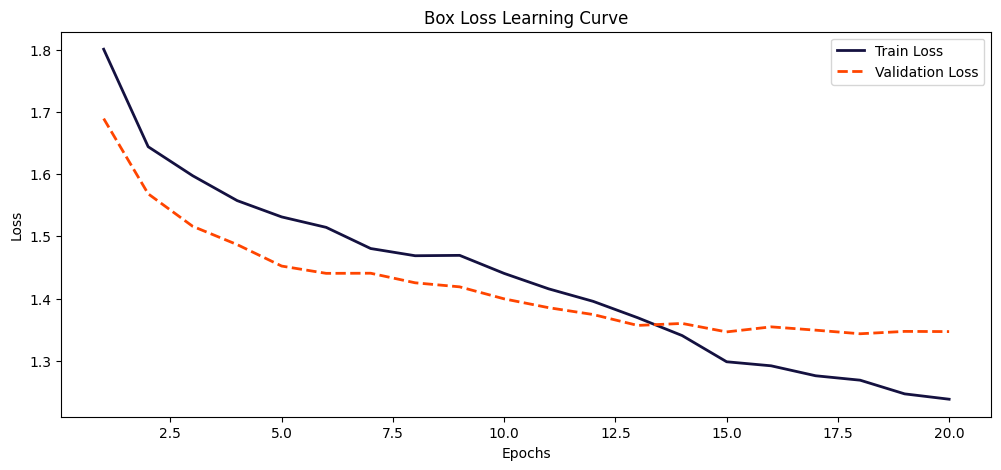

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

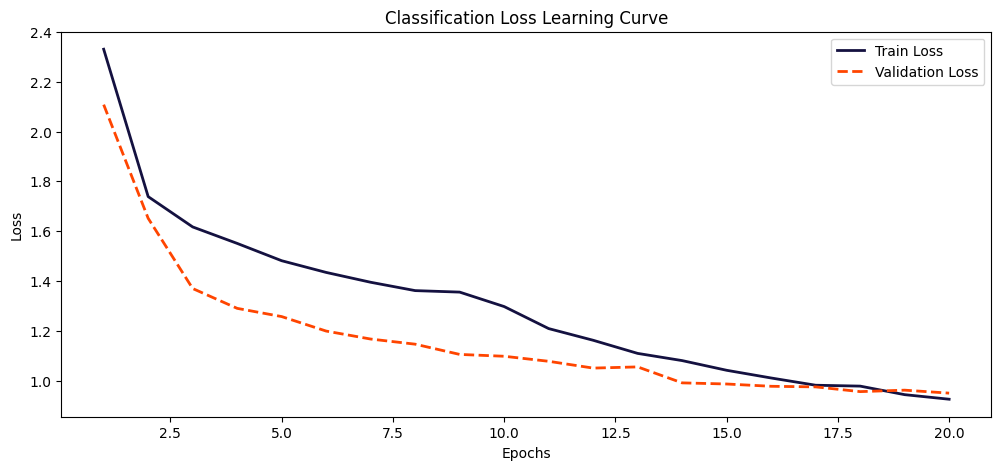

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

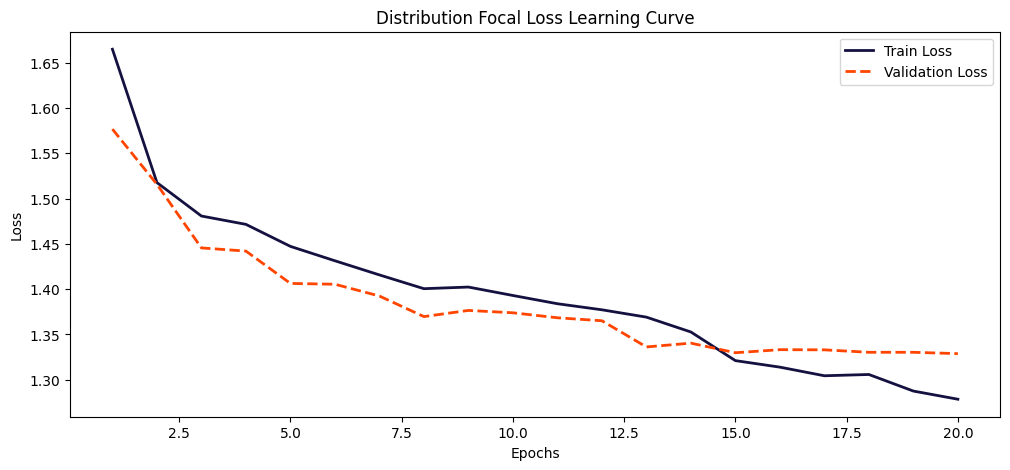

In [7]:
# Create the full file path for 'results.csv' using the directory path and file name
results_csv_path = os.path.join(post_training_files_path, 'results.csv')

# Load the CSV file from the constructed path into a pandas DataFrame
df = pd.read_csv(results_csv_path)

# Remove any leading whitespace from the column names
df.columns = df.columns.str.strip()

# Plot the learning curves for each loss
plot_learning_curve(df, 'train/box_loss', 'val/box_loss', 'Box Loss Learning Curve')
plot_learning_curve(df, 'train/cls_loss', 'val/cls_loss', 'Classification Loss Learning Curve')
plot_learning_curve(df, 'train/dfl_loss', 'val/dfl_loss', 'Distribution Focal Loss Learning Curve')

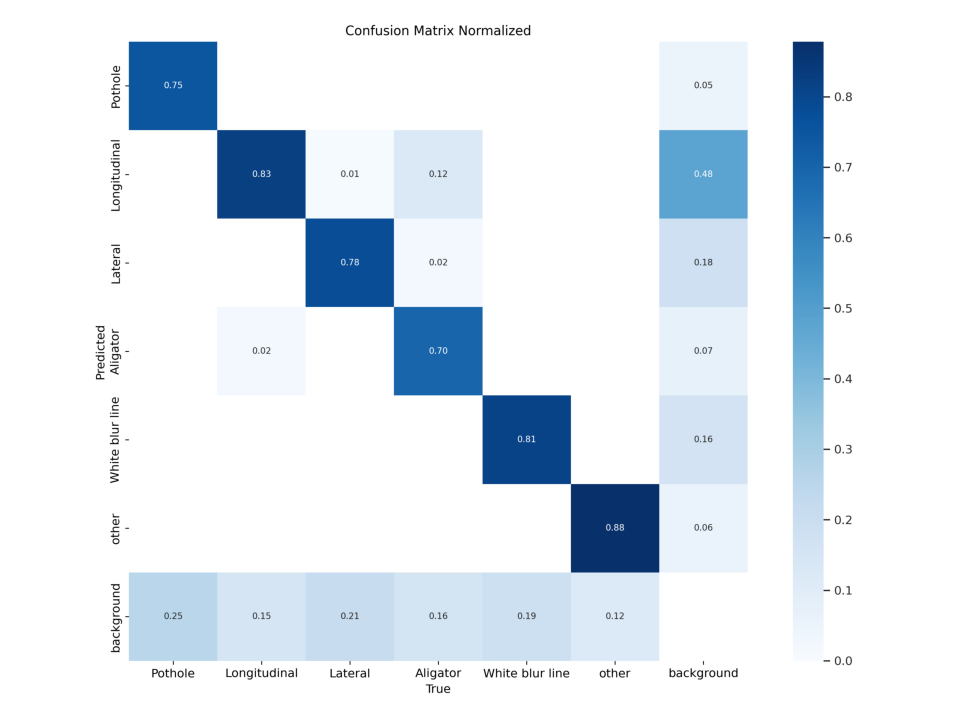

In [8]:

# Construct the path to the normalized confusion matrix image
confusion_matrix_path = os.path.join(post_training_files_path, 'confusion_matrix_normalized.png')

# Read the image using cv2
cm_img = cv2.imread(confusion_matrix_path)

# Convert the image from BGR to RGB color space for accurate color representation with matplotlib
cm_img = cv2.cvtColor(cm_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 10), dpi=120)
plt.imshow(cm_img)
plt.axis('off')
plt.show()

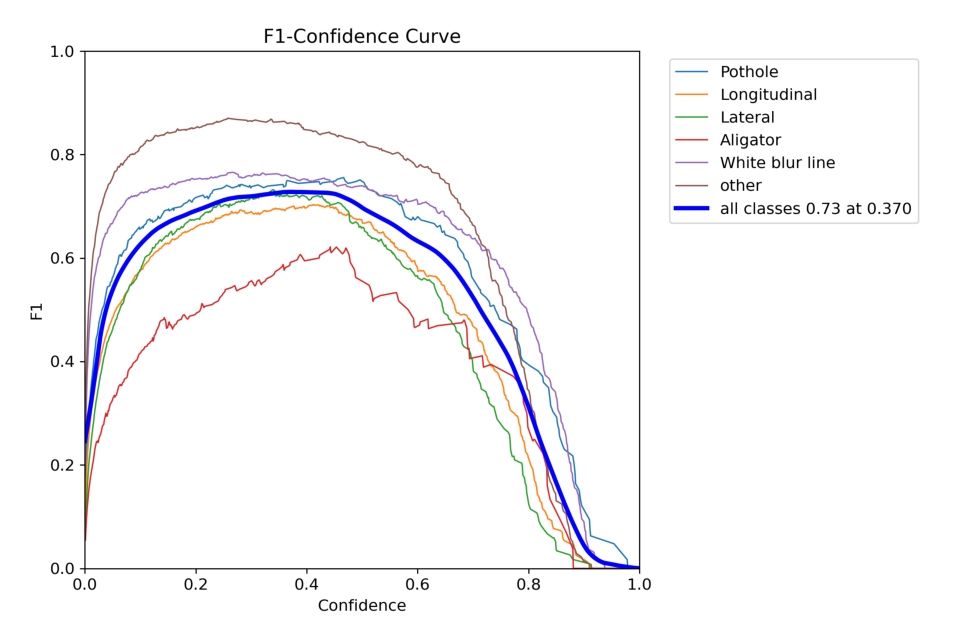

In [9]:

# Construct the path to the normalized confusion matrix imag
F1_curve_path = os.path.join(post_training_files_path, 'F1_curve.png')

# Read the image using cv2
cm_img = cv2.imread(F1_curve_path)

# Convert the image from BGR to RGB color space for accurate color representation with matplotlib
cm_img = cv2.cvtColor(cm_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 10), dpi=120)
plt.imshow(cm_img)
plt.axis('off')
plt.show()

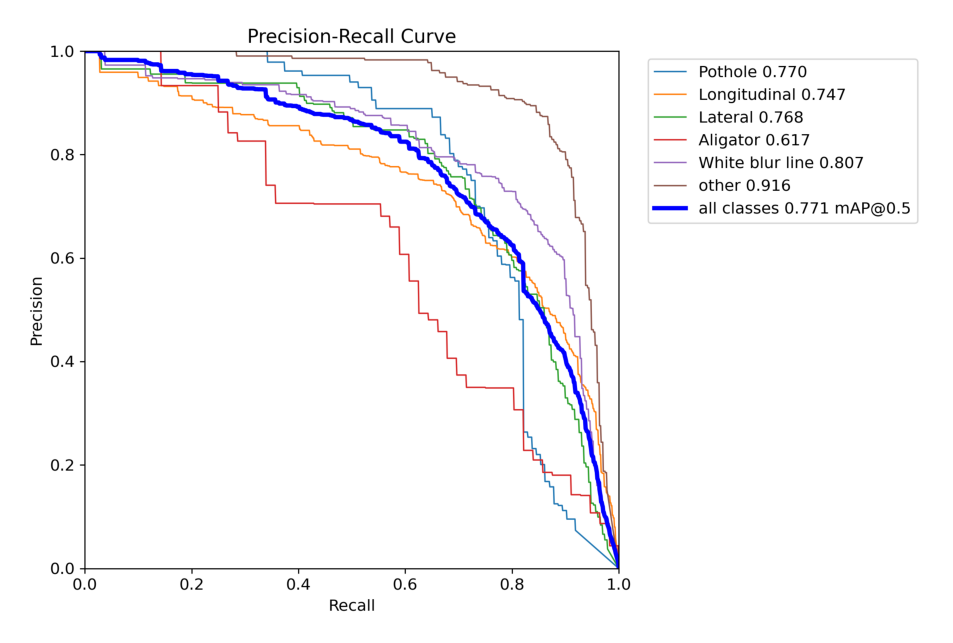

In [10]:

# Construct the path to the normalized confusion matrix imag
PR_curve_path = os.path.join(post_training_files_path, 'PR_curve.png')

# Read the image using cv2
cm_img = cv2.imread(PR_curve_path)

# Convert the image from BGR to RGB color space for accurate color representation with matplotlib
cm_img = cv2.cvtColor(cm_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 10), dpi=120)
plt.imshow(cm_img)
plt.axis('off')
plt.show()

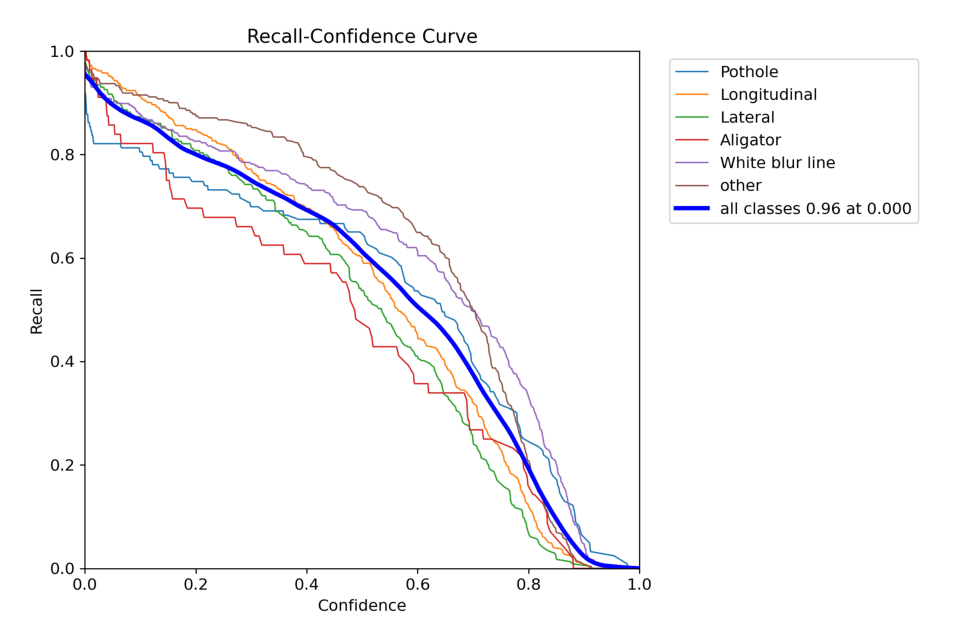

In [11]:

# Construct the path to the normalized confusion matrix imag
R_curve_path = os.path.join(post_training_files_path, 'R_curve.png')

# Read the image using cv2
cm_img = cv2.imread(R_curve_path)

# Convert the image from BGR to RGB color space for accurate color representation with matplotlib
cm_img = cv2.cvtColor(cm_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 10), dpi=120)
plt.imshow(cm_img)
plt.axis('off')
plt.show()

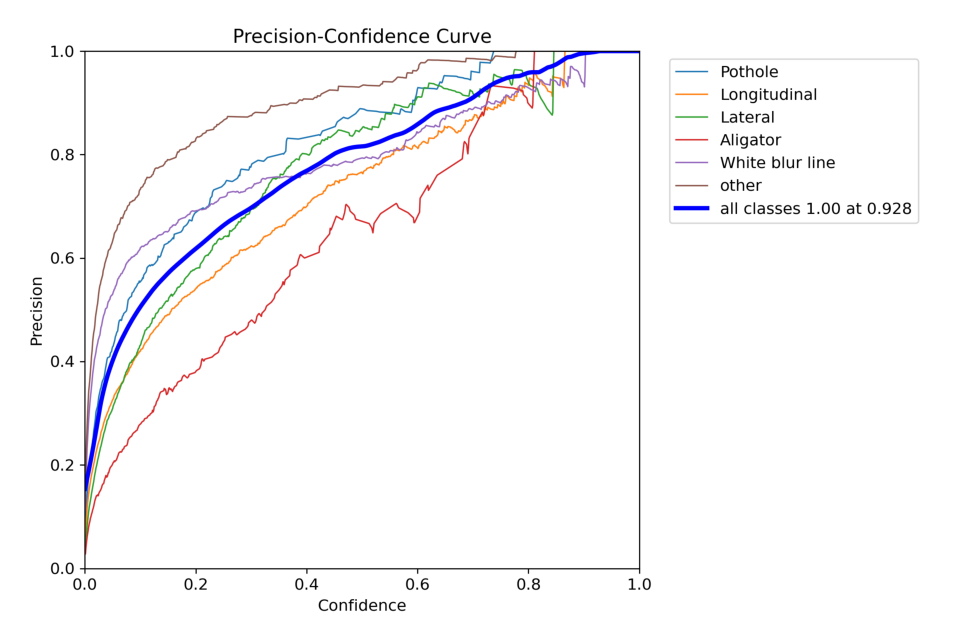

In [12]:

# Construct the path to the normalized confusion matrix imag
P_curve_path = os.path.join(post_training_files_path, 'P_curve.png')

# Read the image using cv2
cm_img = cv2.imread(P_curve_path)

# Convert the image from BGR to RGB color space for accurate color representation with matplotlib
cm_img = cv2.cvtColor(cm_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 10), dpi=120)
plt.imshow(cm_img)
plt.axis('off')
plt.show()

In [13]:
#  Step 5.3 | Performance Metrics Assessment
# Construct the path to the best model weights file using os.path.join
best_model_path = os.path.join(post_training_files_path, 'weights/best.pt')

# Load the best model weights into the YOLO model
best_model = YOLO(best_model_path)

# Validate the best model using the validation set with default parameters
metrics = best_model.val(split='val')

Ultralytics YOLOv8.2.0 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25843234 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /kaggle/input/modifyrdd2/dataset/valid/labels... 766 images, 0 backgrounds, 0 corrupt: 100%|██████████| 766/766 [00:01<00:00, 634.43it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/modifyrdd2/dataset/valid is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 123, len(boxes) = 1468. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:23<00:00,  2.04it/s]


                   all        766       1468      0.766      0.696       0.77      0.469
               Pothole        766        123      0.832      0.675      0.769      0.515
          Longitudinal        766        473      0.695      0.704      0.747      0.453
               Lateral        766        229      0.796      0.651      0.765      0.412
              Aligator        766         56      0.603      0.596      0.617      0.391
       White blur line        766        316      0.758      0.744      0.806      0.522
                 other        766        271      0.909      0.809      0.917       0.52
Speed: 0.5ms preprocess, 20.4ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs/detect/val


In [14]:
# Convert the dictionary to a pandas DataFrame and use the keys as the index
metrics_df = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])

# Display the DataFrame
metrics_df.round(3)

,Metric Value
metrics/precision(B),0.766
metrics/recall(B),0.696
metrics/mAP50(B),0.770
metrics/mAP50-95(B),0.469
fitness,0.499


In [15]:
!yolo task=detect mode=predict model="/kaggle/working/runs/detect/train/weights/best.pt" conf=0.25 source="/kaggle/input/modifyrdd2/dataset/test/images/Japan_001216.jpg" save=True

Ultralytics YOLOv8.2.0 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25843234 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /kaggle/input/modifyrdd2/dataset/test/images/Japan_001216.jpg: 640x640 1 other, 37.1ms
Speed: 4.6ms preprocess, 37.1ms inference, 1815.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


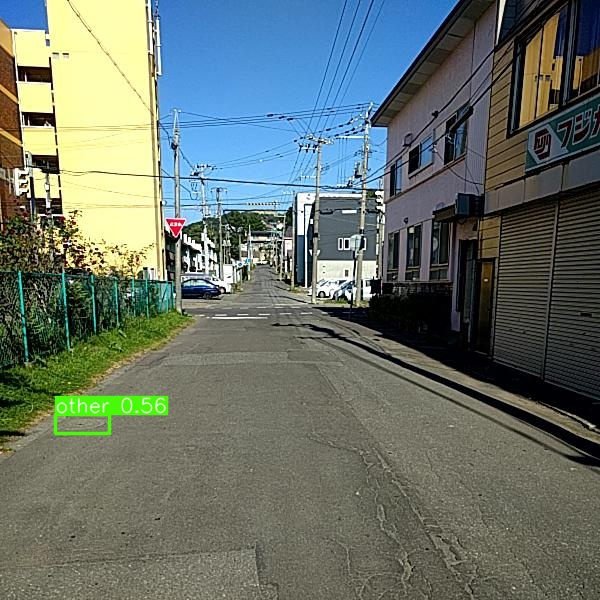

In [17]:
from IPython.display import display, Image
Image(filename=f'/kaggle/working/runs/detect/predict/Japan_001216.jpg',width=600)

In [18]:
!yolo task=detect mode=predict model="/kaggle/working/runs/detect/train/weights/best.pt" conf=0.25 source="/kaggle/input/modifyrdd2/dataset/test/images/Japan_002273.jpg" save=True

Ultralytics YOLOv8.2.0 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25843234 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /kaggle/input/modifyrdd2/dataset/test/images/Japan_002273.jpg: 640x640 1 other, 37.3ms
Speed: 5.6ms preprocess, 37.3ms inference, 1916.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


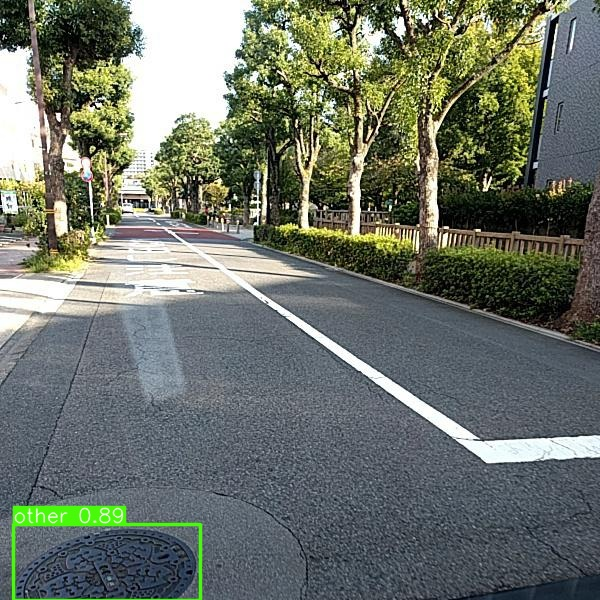

In [21]:
from IPython.display import display, Image
Image(filename=f'/kaggle/working/runs/detect/predict2/Japan_002273.jpg',width=600)

In [22]:
!yolo task=detect mode=predict model="/kaggle/working/runs/detect/train/weights/best.pt" conf=0.25 source="/kaggle/input/modifyrdd2/dataset/test/images/Japan_000030.jpg" save=True

Ultralytics YOLOv8.2.0 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25843234 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /kaggle/input/modifyrdd2/dataset/test/images/Japan_000030.jpg: 640x640 2 White blur lines, 37.2ms
Speed: 4.0ms preprocess, 37.2ms inference, 1995.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


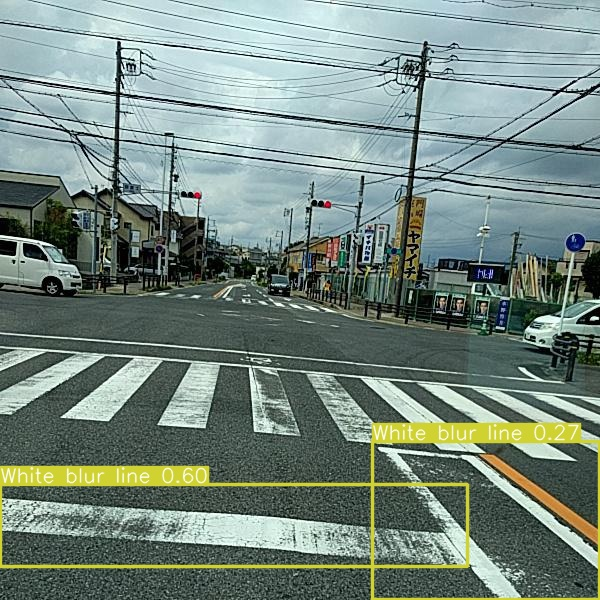

In [23]:
from IPython.display import display, Image
Image(filename=f'/kaggle/working/runs/detect/predict3/Japan_000030.jpg',width=600)

In [24]:
!yolo task=detect mode=predict model="/kaggle/working/runs/detect/train/weights/best.pt" conf=0.25 source="/kaggle/input/modifyrdd2/dataset/test/images/Japan_000175.jpg" save=True

Ultralytics YOLOv8.2.0 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25843234 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /kaggle/input/modifyrdd2/dataset/test/images/Japan_000175.jpg: 640x640 1 White blur line, 38.2ms
Speed: 5.0ms preprocess, 38.2ms inference, 1794.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


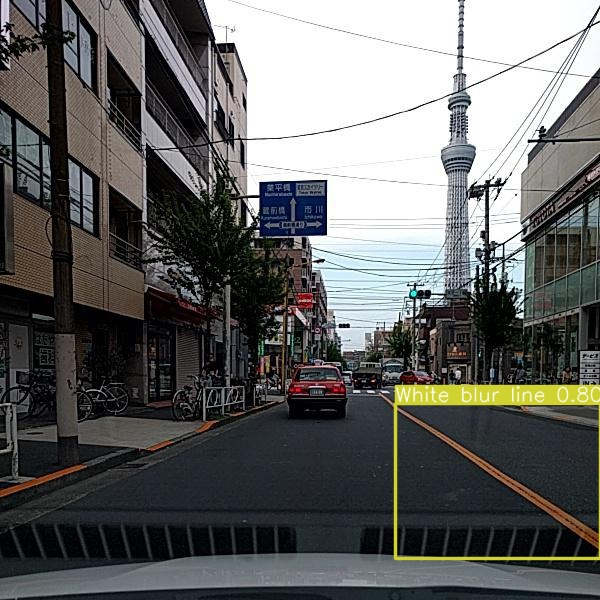

In [25]:
from IPython.display import display, Image
Image(filename=f'/kaggle/working/runs/detect/predict4/Japan_000175.jpg',width=600)